In [1]:
import yfinance as yf
import pandas as pd

# 分析0050
df = yf.download('5704.TWO', period='120d', interval='1d')
df

/Users/rich/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-05,54.200001,54.900002,53.700001,54.099998,52.396423,76000
2023-05-08,54.099998,55.299999,54.099998,54.299999,52.590126,78000
2023-05-09,54.400002,54.400002,51.799999,52.799999,51.137360,131000
2023-05-10,53.500000,54.000000,52.900002,53.799999,52.105869,78000
2023-05-11,54.200001,54.799999,53.200001,53.200001,51.524765,79000
...,...,...,...,...,...,...
2023-10-23,39.900002,41.000000,39.799999,40.400002,40.400002,74000
2023-10-24,41.000000,41.349998,40.450001,41.049999,41.049999,77000
2023-10-25,41.250000,41.349998,40.500000,40.500000,40.500000,70000


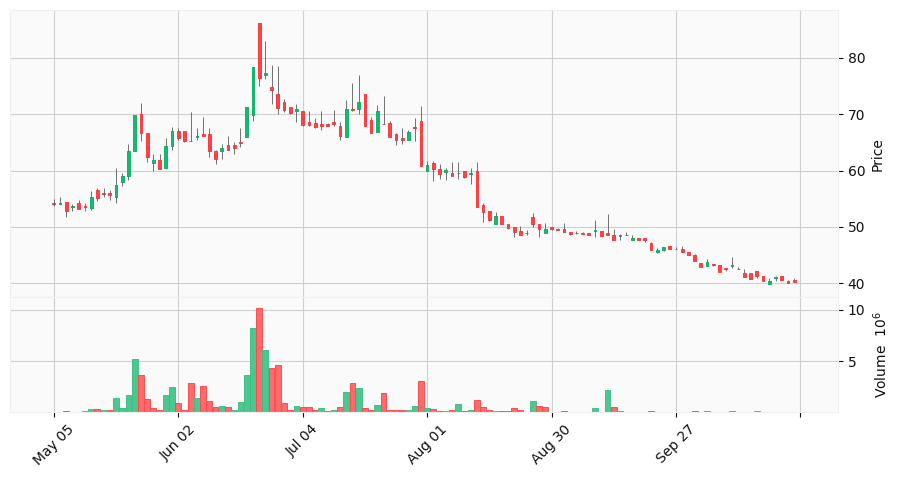

In [2]:
import mplfinance as mpf 

#上漲為綠色, 下跌為紅色
#5日橘色, 10日黃色, 20日紫色
mpf.plot(df, type='candle', style='yahoo',volume=True, figratio=(20, 10))

### 策略
##### 5日均線>10日均線
##### MACD OSI>0
##### 日KD 黃金交叉

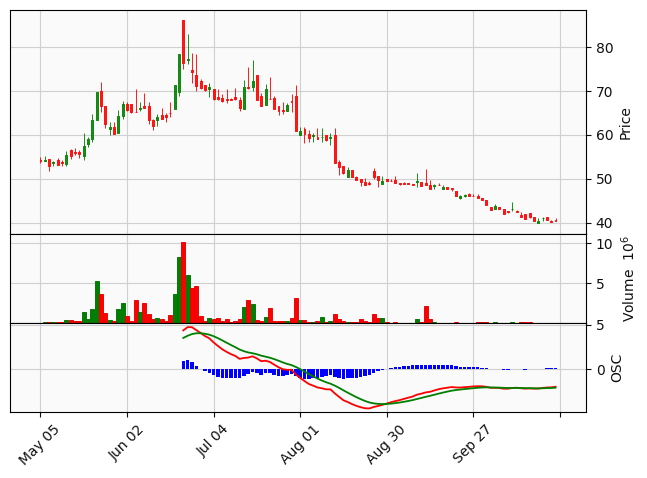

In [3]:
from talib.abstract import MACD

# OSI>0 買進
K_Data=df
K_Data.columns=[ i.lower() for i in K_Data.columns ]
macdData=MACD(K_Data,fastperiod=12,slowperiod=26,signalperiod=9)
K_Data = K_Data.join(macdData)
adplot = []
adplot.append(mpf.make_addplot(K_Data['macd'], panel=2, type='line', marker='.', color='red', \
scatter=False, ylabel='DIF & MACD', secondary_y=False))
adplot.append(mpf.make_addplot(K_Data['macdsignal'], panel=2, type='line', marker='.', color='green', \
scatter=False, ylabel='DIF & MACD', secondary_y=False))
adplot.append(mpf.make_addplot(K_Data['macdhist'], panel=2, type='bar', marker='.', color='blue', \
scatter=False, ylabel='OSC', secondary_y=False))
K_Data_color = mpf.make_marketcolors(up='green', down='red', inherit=True)
K_Data_style = mpf.make_mpf_style(base_mpf_style='yahoo', edgecolor='black', marketcolors=K_Data_color)
mpf.plot(K_Data, type='candle', style=K_Data_style, volume=True, addplot=adplot)


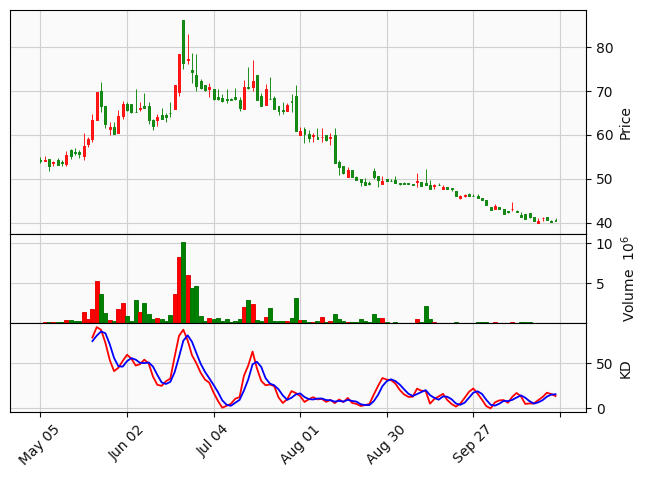

In [4]:
from talib.abstract import STOCH
import yfinance as yf
import mplfinance as mpf

# K>D 買進
stochData=STOCH(K_Data,fastk_period=9,slowk_period=3,slowd_period=3)
K_Data = K_Data.join(stochData)
adplot = []
adplot.append(mpf.make_addplot(K_Data['slowk'], panel=2, type='line', marker='.', \
color='red', scatter=False, ylabel='KD', secondary_y=False))
adplot.append(mpf.make_addplot(K_Data['slowd'], panel=2, type='line', marker='.', \
color='blue', scatter=False, ylabel='KD', secondary_y=False))
K_Data_color = mpf.make_marketcolors(up='red', down='green', inherit=True)
K_Data_style = mpf.make_mpf_style(base_mpf_style='yahoo', edgecolor='black', marketcolors=K_Data_color)
mpf.plot(K_Data, type='candle', style=K_Data_style, volume=True, addplot=adplot)


In [5]:
from talib.abstract import CDL3BLACKCROWS
import yfinance as yf 

Pattern = CDL3BLACKCROWS(K_Data)  
Result=Pattern[Pattern!=0]  
if len(Result)!=0:
    print('這個期間共有 {} 筆三烏鴉型態訊號:'.format(len(Result)))
    for i in range(len(Result)):
        print(Result.index[i],Result[i]) 
else:
    print('這個期間沒有三烏鴉型態訊號')

這個期間沒有三烏鴉型態訊號


In [6]:
from talib.abstract import CDLENGULFING 
import yfinance as yf 

Pattern = CDLENGULFING(K_Data)  
Result=Pattern[Pattern!=0]  
if len(Result)!=0:
    print('這個期間共有 {} 筆吞噬型態訊號:'.format(len(Result))) 
    for i in range(len(Result)):
        print(Result.index[i],Result[i])
else:
    print('這個期間沒有吞噬型態訊號')

這個期間共有 11 筆吞噬型態訊號:
2023-05-09 00:00:00 -100
2023-05-11 00:00:00 -100
2023-05-15 00:00:00 100
2023-05-19 00:00:00 100
2023-07-13 00:00:00 100
2023-07-18 00:00:00 -100
2023-07-24 00:00:00 -100
2023-08-10 00:00:00 -100
2023-08-14 00:00:00 -100
2023-09-19 00:00:00 -100
2023-10-25 00:00:00 -100
